In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
plt.style.use('dark_background')

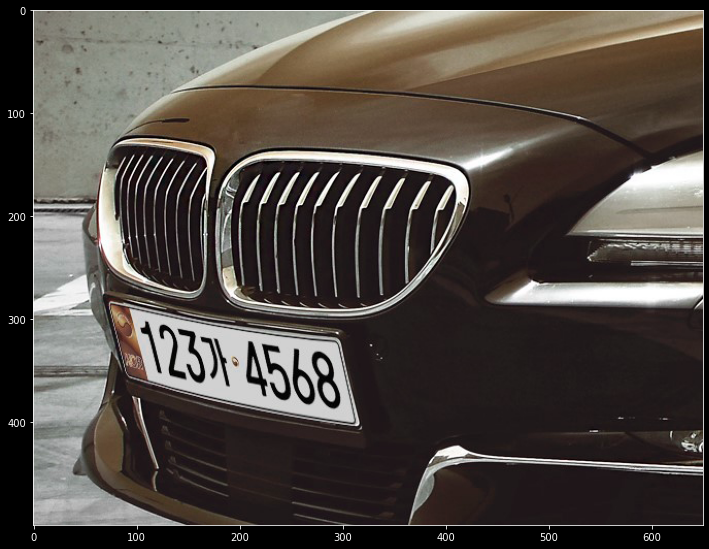

In [2]:
img_ori = cv2.imread('0.jpg')

height, width, channel = img_ori.shape

plt.figure(figsize=(12, 10))
plt.imshow(img_ori, cmap='gray')

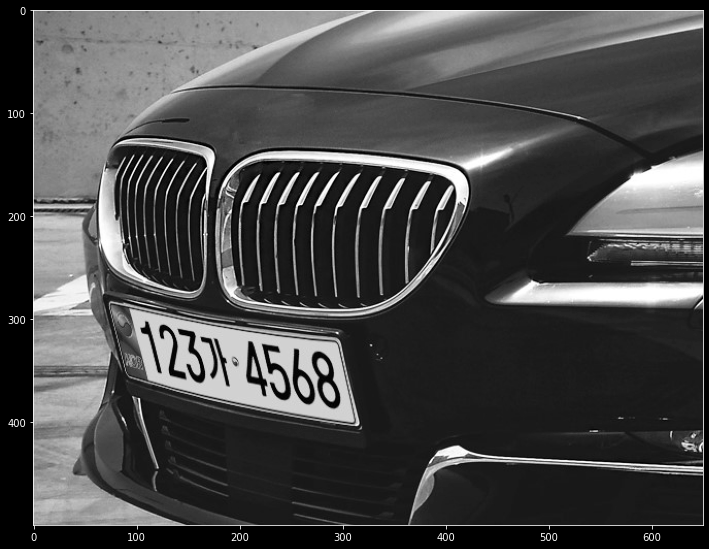

In [3]:
gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 10))
plt.imshow(gray, cmap='gray')

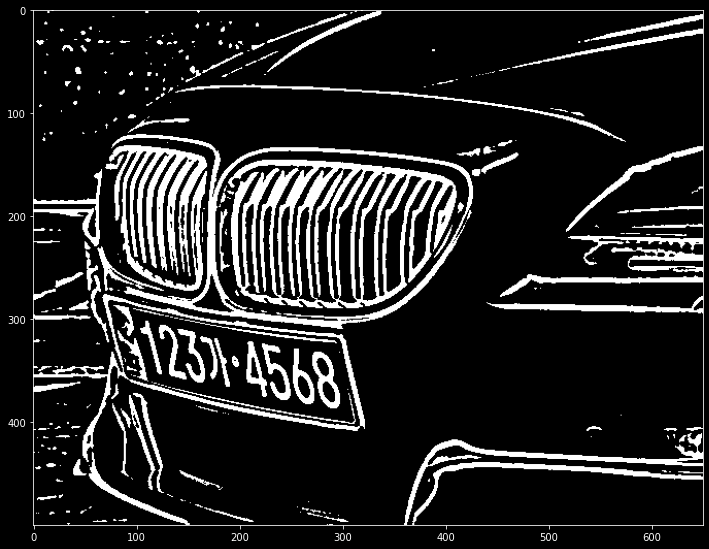

In [4]:
#노이즈 줄이기 위해서
img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

#이미지의 Threshold 지정하여 예로 그래프 곡선이면 임의의 값 255 지정 해버리면 Threshold 보다 낮은값은 0으로 취급 Threshold 보다 높은값은 255로 고정 이미지를 구분하기 쉽게 만드는 용도
img_thresh = cv2.adaptiveThreshold(
    img_blurred,
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=19,
    C=9
)

plt.figure(figsize=(12, 10))
plt.imshow(img_thresh, cmap='gray')

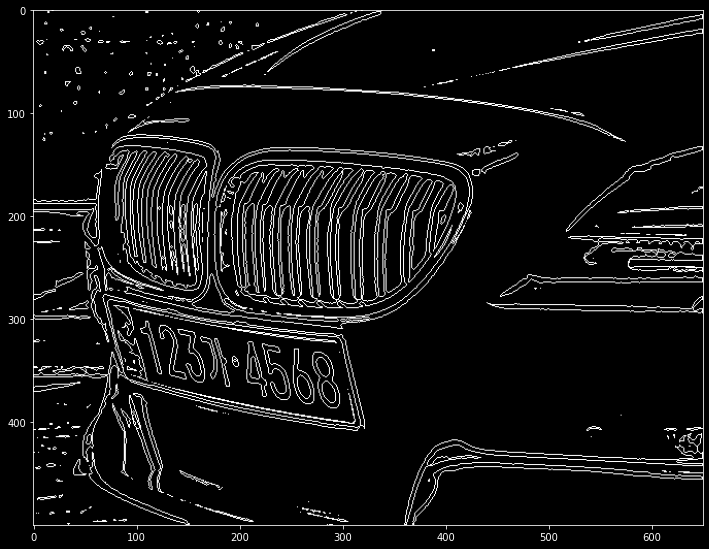

In [5]:
#윤곽선 그리기 / contourldx에 -1의 값을 줘서 전체 contours를 그림
contours,_ = cv2.findContours(
    img_thresh, 
    mode=cv2.RETR_LIST, 
    method=cv2.CHAIN_APPROX_SIMPLE
)

temp_result = np.zeros((height, width, channel), dtype=np.uint8)

cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255, 255, 255))

plt.figure(figsize=(12, 10))
plt.imshow(temp_result)


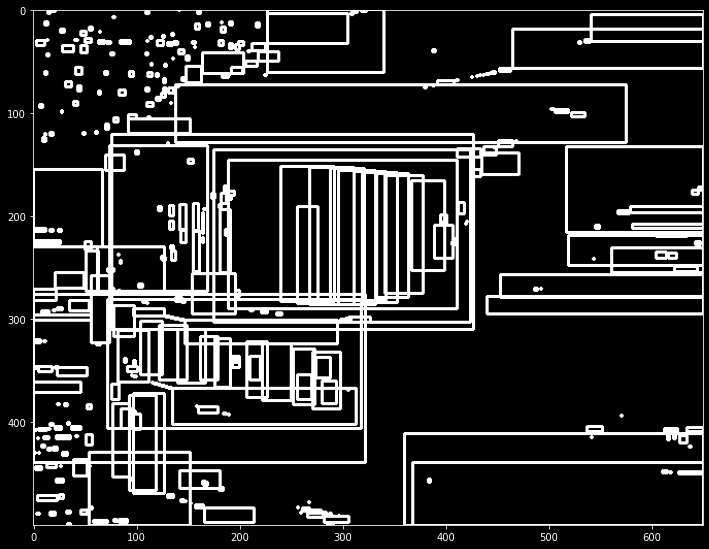

In [6]:
#번호판 쉽게 찾기 위해 조정
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

contours_dict = []

#boundingRect함수 사용해서 contour를 감싸는 사각형을 만듬
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(temp_result, pt1=(x, y), pt2=(x+w, y+h), color=(255, 255, 255), thickness=2)
    
    contours_dict.append({
        'contour': contour,
        'x': x,
        'y': y,
        'w': w,
        'h': h,
        'cx': x + (w / 2),
        'cy': y + (h / 2)
    })

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')